# Transformada de fourier en python - F2 2c2020
### Notebook hecho por Milton Katz

<figure>
<center>
<img src='https://imgs.xkcd.com/comics/fourier.jpg'  width="" height="300"/>
</center>
</figure>

Ya estuvimos hablando de cómo funciona la serie de Fourier y la transformada en clase y ya hablaron con Ricardo sobre la app spectroid. Como se imaginan, Python también tiene formas de hacer la transformada y ya que estamos les voy a contar algunas cositas lindas para lo que se usa la transformada.

Como vimos en clase, si tomamos una función y la integramos multiplicada por $cos(k^{(p)}x)$ o $sen(k^{(p)}x)$ o por sus equivalentes temporales $cos(\omega^{(p)}t)$, $sen(\omega^{(p)}t)$, puedo entender cómo escribir la función como suma de senos y cosenos que cumplan las condiciones de contorno del problema. Por la identidad de Euler que relaciona los senos y cosenos con las exponenciales complejas se puede llegar a una forma más general de esta sumatoria que es

\begin{equation}
  f(t) = \sum_{n = -\infty}^{+\infty} c_n e^{-i \frac{2n \pi}{T} t} 
\end{equation}

Donde T es el período de la función o en el caso en el que no sea periódica el largo de su dominio (qué pasa si el dominio de la función es infinito?). Para calcular los $c_n$ en lugar de integrar multiplicando por seno o coseno integramos multiplicando por la exponencial. No se asusten, es simplemente una forma más general de escribir lo mismo.

$$c_n = \frac{1}{T}\int^{T}_{0} f(t) e^{i \frac{2n\pi}{T} t }dt$$


En Python no podemos hacer esto mismo como lo vemos en clase porque implicaría integrar y Python no se lleva bien con las funciones continuas. Por eso, lo que hacemos en Python es una versión discreta que es la transformada discreta de fourier. 

$$c_n = \sum^{N-1}_{k = 0} f[k]~e^{i \frac{2\pi}{N} nk}$$

Donde n significa lo mismo que antes (el número de modo) y k es el indice del vector tiempo. Les dejo a ustedes como ejercicio entender la relación entre la forma continua y la forma discreta de escribir $c_n$

En los calculos computacionales de esta sumatoria se usa un algoritmo llamado fast fourier transform (o fft) que es una forma rápida de hacer esta transformada discreta.


Primero usemos la fft para calcular un espectro que ya conocemos de antemano.




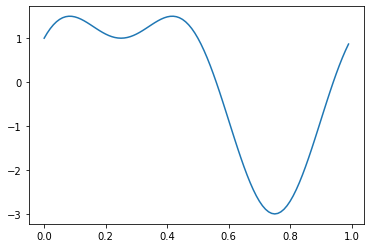

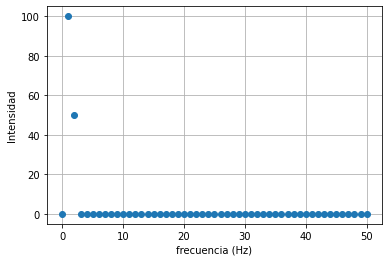

In [ ]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

t = np.arange(0,1,0.125)
psi_t = 2*np.cos(2*np.pi*t-np.pi/2) + np.cos(4*np.pi*t)
psi_w = sp.fft.rfft(psi_t)
frec = sp.fft.rfftfreq(len(psi_t),t[1]-t[0])


plt.plot(frec,abs(psi_w),'o')
plt.grid()
plt.xlabel('frecuencia (Hz)')
plt.ylabel('Intensidad');



Del código que ven arriba podemos aprender mucho. La función *psi_t* es la suma de un coseno de $1 Hz$ con otro de $2Hz$, en el gráfico vemos estas dos frecuencias y vemos la proporción correcta entre una amplitud y la otra (la de $1Hz$ es el doble). Sin embargo, una vale 8 y otra vale 4 que no tiene nada que ver con el 2 y el 1 que vemos en la función. Esto es porque para interpretar bien el resultado hay que multiplicarlo por $2/N$ siendo $N$ la cantidad de puntos que tiene el array con el cual defino mi función *psi_t*. Probemoslo.



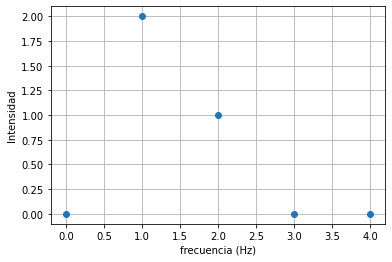

In [ ]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

t = np.arange(0,1,0.125) #defino mi vector de tiempos
psi_t = 2*np.cos(2*np.pi*t-np.pi/2) + np.cos(4*np.pi*t) #esta es mi funcion dependiente del tiempo
psi_w = sp.fft.rfft(psi_t) #calculo la función dependiente de la frecuencia
frec = sp.fft.rfftfreq(len(psi_t),t[1]-t[0]) #Esto me devuelve para qué frecuencias estoy obteniendo del resultado anterior

plt.plot(frec,2*abs(psi_w)/len(psi_t),'o')
plt.grid()
plt.xlabel('frecuencia (Hz)')
plt.ylabel('Intensidad');


Otra cosa que vemos es que el código que usé es *sp.fft.rfft* ya les conté lo que significa fft, pero qué nos dice la r? La r nos dice que lo que estoy usando como entrada es una señal real, que es lo que vamos a usar en la materia así que no voy a ahondar en el otro caso. Solo les cuento que si no usan la r van a recibir como salida de la fft más cantidad de puntos con información repetida.

Por otro lado, usé la función *sp.fft.rfftfreq* que me dice para qué valores de frecuencias me dió los resultados anteriores, cosa que no es trivial saber. Esto no depende de la función que usemos sino de la cantidad de puntos y de la diferencia de tiempos que estemos usando, por eso le di *t[1]-t[0]* aunque podría haber usado cualquier cosa de la forma *t[n]-t[n-1]*

Una última observación sobre este código es que a la hora de graficar no estoy graficando el resultado de la rfft sino su módulo, esto es porque el resultado son números complejos.

In [ ]:
print(psi_w)

[ 0.0000000e+00+0.00000000e+00j -4.4408921e-16-8.00000000e+00j
  4.0000000e+00-1.33226763e-15j  4.4408921e-16+0.00000000e+00j
  8.8817842e-16+0.00000000e+00j]


Viendo el resultado, se les ocurre qué significa la parte compleja? No es fácil pero tampoco es fundamental que lo entiendan ahora así que puedo no contarselos y dormir tranquilo, además se que a lo largo de la materia va a quedar más claro. (pista: hay solo un valor con parte imaginaria en el resultado y justo coincide con un coseno que tiene algo distinto)


Ya visto esto que es el ejemplo más básico vamos con algo más complejo, como no recibí respuestas de cómo determinar las frecuencias que se veían en el batido de mi guitarra se los voy a resolver yo, quedan otras maneras de hacerlo, todavía se pueden ganar la estrellita dorada que NO suma puntos para el parcial.

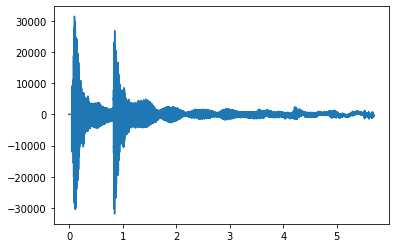

In [ ]:
# Esto es para traer el archivo que está en mi drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from scipy.io import wavfile

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1wuYwAZTZ3hIVs8A4R38eq-tVhJFzipYK"})
downloaded.GetContentFile('batidos.wav')

fs, guitarra = wavfile.read('batidos.wav') #esto me va a devolver la onda que está guardada en el archivo wav y la frecuencia de sampleo, es decir cuantos puntos por segundo tengo, con eso me puedo armar mi vector tiempo

t = np.arange(0,len(guitarra)/fs, 1/fs)
plt.plot(t,guitarra);


Es la misma onda que veiamos con el audaciy que les mostré, ahora veamos el espectro en frecuencias como hicimos antes

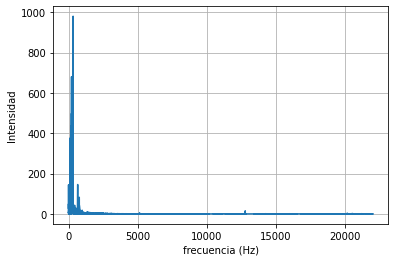

In [ ]:
fft_guitarra = sp.fft.rfft(guitarra)
frec = sp.fft.rfftfreq(len(guitarra),1/fs)

plt.plot(frec,2*abs(fft_guitarra)/len(guitarra))
plt.grid()
plt.xlabel('frecuencia (Hz)')
plt.ylabel('Intensidad');

Excelente, hagamos un poco de zoom para visualizarlo bien y usemos *scipy.signal.find_peaks* para hallar los picos en el espectro




[216.8852459  329.81333014 331.57233457]


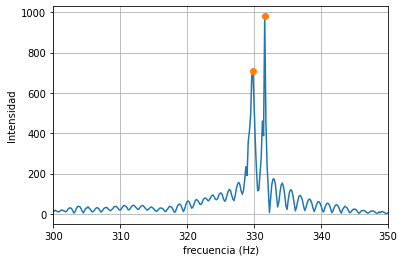

In [ ]:
from scipy import signal as sg
plt.plot(frec,2*abs(fft_guitarra)/len(guitarra))
plt.grid()
plt.xlabel('frecuencia (Hz)')
plt.ylabel('Intensidad');
plt.xlim([300,350])

picos,_ = sg.find_peaks(abs(fft_guitarra),max(2*abs(fft_guitarra)/3)) # me devuelve los indices de los picos en picos y los valores que no se los pido y pongo el _
plt.plot(frec[picos],2*abs(fft_guitarra[picos])/len(guitarra),'o');

print(frec[picos])

Como ven, a *signal_peaks* además de la función para que analice le di un parámetro extra, éste es a partir de qué altura considerar los picos. Si no le hubiese establecido eso, cada oscilación que vemos ahí la hubiese tomado como un pico y no me interesaba eso.

Las frecuencias son $329,8$ y $331,6 Hz$ que corresponden a un mi y un mi desafinado respectivamente

También se ve que había otra frecuencia más con suficiente intensidad para considerarla candidata a ser de las frecuencias que toqué en la guitarra y ahí viene la habilidad del científico de saber qué es lo que está buscando. En mi caso yo sabía que buscaba dos notas y no tres y que tienen que estar muy pegadas entre sí. También se que la grabación fue mala (también el músico) y con mucho ruido y que es factible que se haya metido una frecuencia que no quería. Por último, si todavía les quedan dudas de si está bien jugarnosla a decir que estas son las frecuencias que estamos buscando podemos corroborar usando otro método, esa parte se las dejo a ustedes.

## Algunas aplicaciones prácticas

Ya vimos la aplicación más conocida y la que ya habíamos hablado en clase, pero en serio no se dan una idea de la cantidad de usos que tiene, incluso en la vida cotidiana.

Para entender el próximo ejemplo quiero que piensen qué pasa si a un sistema le doy un golpe y lo dejo evolucionar, esto ya lo conocen, es darle una velocidad inicial al sistema, lo que va a pasar al final es que voy ver cuales son sus modos normales, todos los que el sistema tenga,también voy a ver cuáles tienen más peso y cuáles menos, esto se llama respuesta al impulso y fijense que todo lo que les estoy diciendo que voy a ver es sobre el sistema y no sobre el impulso que estoy dando. Dar la respuesta al impulso de un sistema es una muy buena forma de caracterizarlo, especialmente cuando el sistema es demasiado complejo como para calcular sus modos normales. La respuesta al impulso la podemos ver en el eje temporal o en el eje frecuencial y con el ejemplo anterior sabemos perfectamente como pasar de uno a otro, de hecho, lo que escribí recién sobre cómo la respuesta al impulso me va a decir cuáles son los modos normales del sistema es mucho más visible si lo miramos en el espectro frecuencial.

Supongamos que tengo una señal, por ejemplo el sonido de mi guitarra ($g(\omega)$) y la respuesta en frecuencia de un sistema, por ejemplo el living de mi casa ($h(\omega)$), el producto $h(\omega)~g(\omega)$ me va a decir cómo sonaría la guitarra en el living de mi casa porque cada frecuencia que tiene mi guitarra se va a ver amplificada en mayor o menor medida por el ambiente.

Pero cómo hago para tener la respuesta al impulso del living de mi casa? Puedo, por ejemplo grabar la exploción de un globo o el sonido de un aplauso. 

Cuando estudiaba en la UNTREF, hice un trabajo práctico sobre esto y me quedó perdido en algún lugar recóndito de mi Drive, la explosión de un globo en una de las aulas de la universidad. Ahora puedo divertirme escuchando cómo sonaría mi voz en ese aula y pensando que estoy dando clases presenciales.

In [ ]:
from IPython.display import Audio

downloaded = drive.CreateFile({'id':"1nqYC8AqDSQ0Kx8c1Okf0_MLSuPmbIUE_"})
downloaded.GetContentFile('mivoz.wav')

downloaded = drive.CreateFile({'id':"1jBI1OQlqLiriWbCHyauHBaxuoYV5Z8UB"})
downloaded.GetContentFile('globo.wav')


fs_globo, globo = wavfile.read('globo.wav') 
fs_mivoz, mivoz = wavfile.read('mivoz.wav') 

Audio(mivoz,rate=fs_mivoz)


Para ver como quedaría mi voz dentro del aula donde grabé la explosión del globo, hagamos la fft de ambas señales, multipliquemoslas y hagamos la fft inversa para volver a ver la evolución temporal.

In [ ]:
tamaño = max(len(globo), len(mivoz)) #Tengo que usar la misma longitud para ambas señales para poder multiplicarlas, me quedo con la más grande de las dos 

fft_mivoz = sp.fft.rfft(mivoz,tamaño) #dando el tamaño acá estoy llenando de ceros la señal más corta hasta que iguale a la señal más larga
fft_globo = sp.fft.rfft(globo,tamaño)

mivoz_enaula = sp.fft.irfft(fft_globo*fft_mivoz) 

Audio(mivoz_enaula,rate = fs_mivoz)

Esto se pone todavía mejor, porque si esto lo puedo hacer con sonido y ambientes, también lo podría hacer con otro tipo de señales y sistemas. Todxs habrán usado alguna vez un filtro de Instagram y no me refiero a ponerse antenitas de abeja y voz aguda cuando graban un video, sino esos filtros que retocan un poco el color de la imágen para que se vea más cool. Estos filtros originalmente estuvieron inspirados en cámaras vintage que por cómo envejecieron sacan fotos con características muy particulares. En vez de defectos, estas particularidades, empezaron a usarse a propósito como decisión artística. Acá entra Instagram y dice, por qué no me compro muchas de estas cámaras, les mido la respuesta al impulso y con la ayuda de mi querida fft hago que la foto que acabas de sacar se vea como si la hubieses sacado en una de estas cámaras vintage. Bueno, esto que conté no es tan así, a Instagram no se le ocurrió esto, ya existía pero es una forma linda de decirlo.



(571, 800, 3)


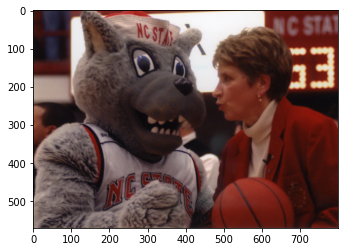

In [ ]:
import imageio as img

imagen = img.imread("https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",format = 'jpg') #Me devuelve tres matrices, una con las intensidades de rojo en cada pixel otra con las del azul y otras con las del verde

plt.imshow(imagen);
print(np.shape(imagen))


En la forma de la imagen se ve que se tienen tres dimensiones en vez de las dos que vemos en la foto. Eso es porque la imagen se forma con tres matrices de $571 \times 800$ pixels, en donde cada matriz tiene la intensidad de cada pixel en un dado color (por ejemplo: rojo, verde y azul) para simplificar el problema, vamos a usar una sola matriz y decirle a matplotlib que es una imagen en escala de grises

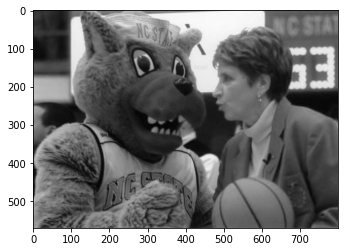

In [ ]:
imagen_BN = imagen[:,:,0]
plt.imshow(imagen_BN,cmap = 'gray');

En vez de un filtro de una camara, vamos a usar uno más fácil de implementara acá, ya que se hace con una función conocida en vez de tener que medir la respuesta al impulso de una cámara. Vamos a usar un filtro muy conocido que es el gaussian blur. Este filtro hereda su nombre de la función gaussiana, ésta función es la que le da la forma a la respuesta al impulso del sistema. Veamos primero un gráfico de cómo es esta función para quien no la conozca

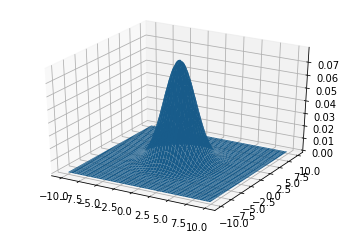

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
x,y = np.meshgrid(x, y) #Esto me genera dos matrices que me sirven para evaluar la función de una manera bidimensional y obtener un resultado bidimiensional
rad = 2 #Este parámetro me va a marcar que tan ancha es mi campana, ahora lo llamo radio pero para quienes conozcan esta función se le suele llamar sigma o desvío estándar
gauss = 1/(2. * np.pi * rad) * np.exp(-(x**2 + y**2)/(2*rad**2))



ax.plot_surface(x,y,gauss);




Para el filtro que quiero usar voy a usar la misma función pero con la x y la y definidas distinto, la cantidad de puntos que quiero tener tienen que ser los mismos que los pixels de la imágen y mi campana la voy a tener centrada en una esquina.

Prueben jugar modificando el radio que es lo que va a determinar qué tan fuerte se va a aplicar este filtro. El resultado final va a ser la imágen "blureada" o difuminada

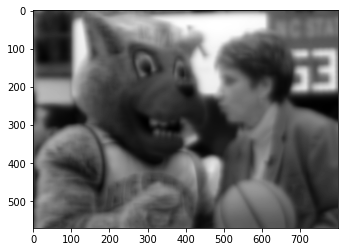

In [ ]:

x = np.arange(0,np.shape(imagen)[1])
y = np.arange(0,np.shape(imagen)[0])
x,y = np.meshgrid(x, y)
rad = 10
gauss = 1/(2. * np.pi * rad) * np.exp(-(x**2 + y**2)/(2*rad**2))


fft_imagen = sp.fft.rfft2(imagen[:,:,0]) #El dos es porque necesito hacer la fft en dos dimensiones, la imagen es una matriz de pixels, no es un vector.
fft_gauss = sp.fft.rfft2(gauss)

blur_imagen = sp.fft.irfft2(fft_imagen*fft_gauss)
plt.imshow(blur_imagen,'gray');